In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats

## Mean &plusmn; z Standard Deviations (Empirical)

In [ ]:
# 1 SD = 68%
# 2 SD = 95%
# 3 SD = 99.7%
# Only applies to normally distributed variables

In [2]:
births = Table.read_table('baby.csv')

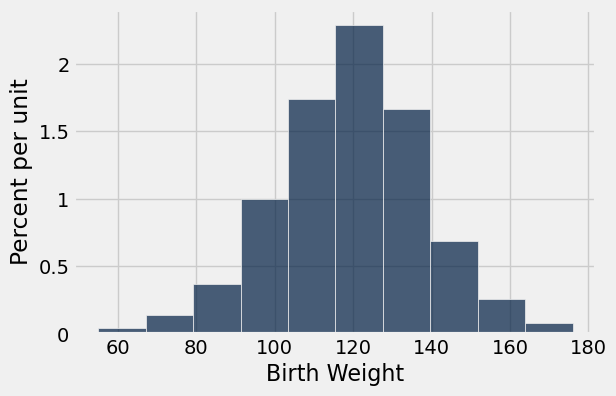

In [4]:
births.hist('Birth Weight')

In [5]:
# See how Chebyshev's bounds work for Birth Weight
    
birth_weight = births.column('Birth Weight')
mean = np.mean(birth_weight)
sd = np.std(birth_weight)
print()
print('Birth Weight')

for z in make_array(1, 2, 3):
    chosen = births.where('Birth Weight', are.between(mean - z*sd, mean + z*sd))
    proportion = chosen.num_rows / births.num_rows
    percent = round(proportion * 100, 2)
    print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 1 SDs: 69.25 % of the data
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data


## Mean &plusmn; z Standard Deviations (Normal)

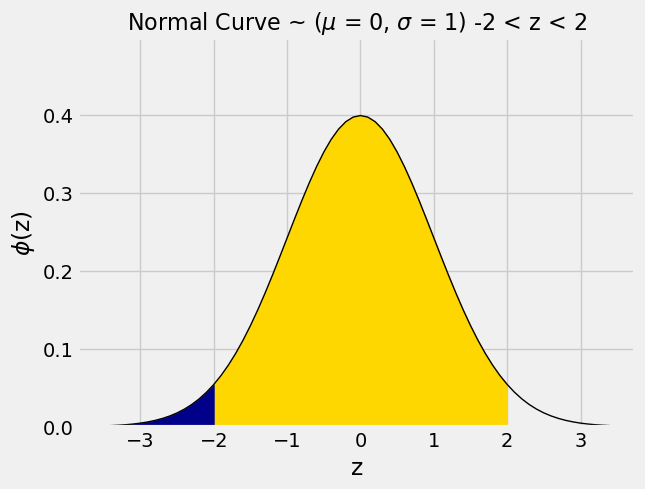

In [6]:
plot_normal_cdf(rbound = 2, lbound = -2, mean = 0, sd = 1)

In [7]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.95449973610364158

Area between +/- 1.0 standard deviations: 0.6827


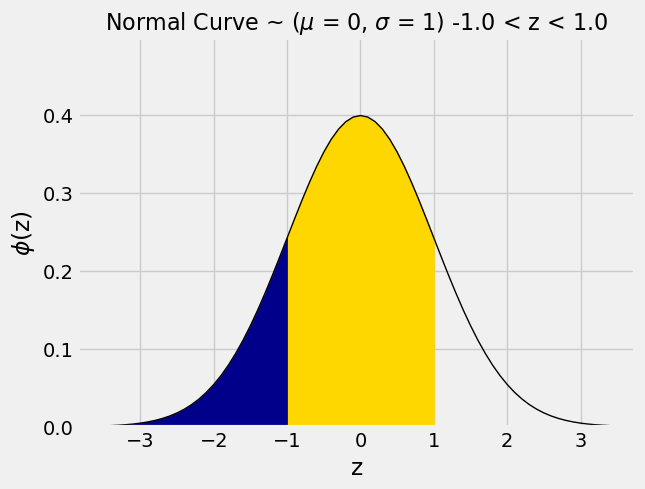



Area between +/- 2.0 standard deviations: 0.9545


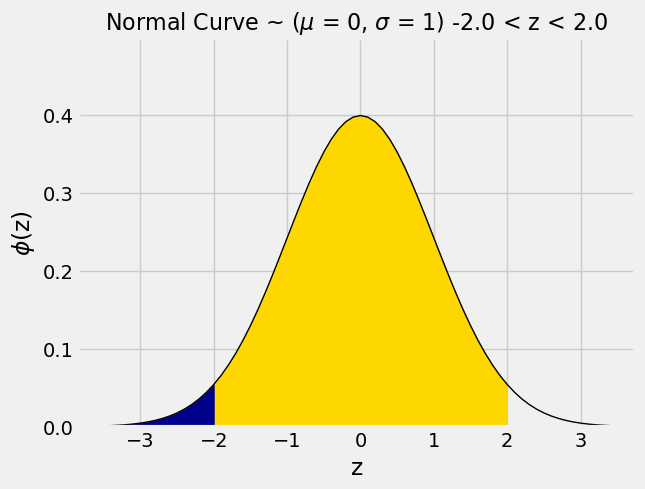



Area between +/- 3.0 standard deviations: 0.9973


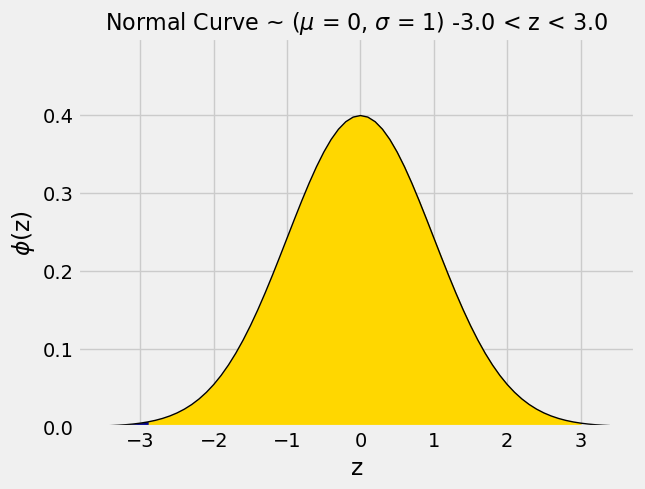

In [8]:
for i in np.arange(1,3.1):
    print(
        'Area between +/-', 
        i, 
        'standard deviations:',
        np.round(stats.norm.cdf(i) - stats.norm.cdf(-1*i), 4)
    )
    
    plot_normal_cdf(rbound = i, lbound = -1*i, mean = 0, sd = 1)
    
    print('\n')

Area between +/- 1.0 standard deviations: 0.6827


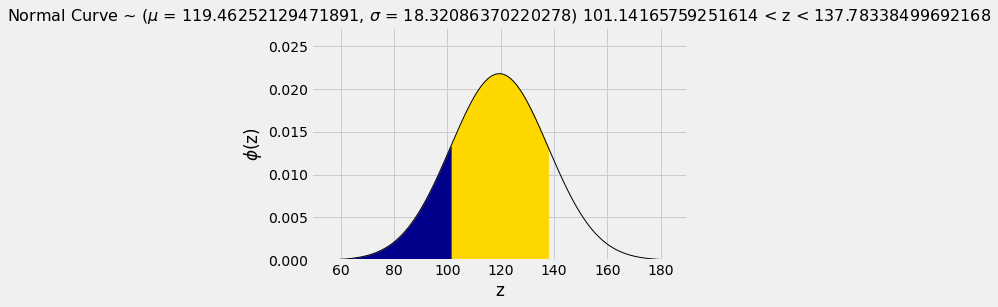



Area between +/- 2.0 standard deviations: 0.9545


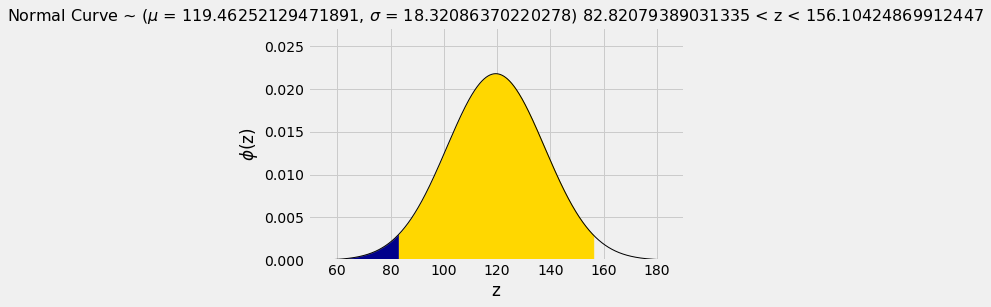



Area between +/- 3.0 standard deviations: 0.9973


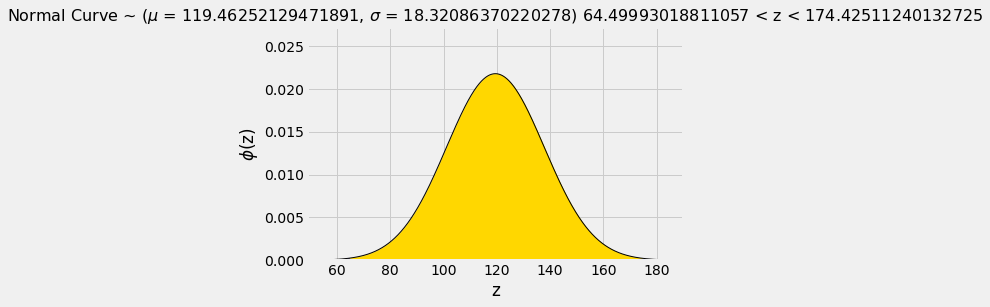

In [36]:
for i in np.arange(1,3.1):
    print(
        'Area between +/-', 
        i, 
        'standard deviations:',
        np.round(
            stats.norm.cdf(mean + i*sd, loc=mean, scale=sd) - stats.norm.cdf(mean - i*sd, loc=mean, scale=sd),
            4)
    )
    
    plot_normal_cdf(rbound = mean + i*sd, lbound = mean - i*sd, mean = mean, sd = sd)
    
    print('\n')

## Central Limit Theorem ##

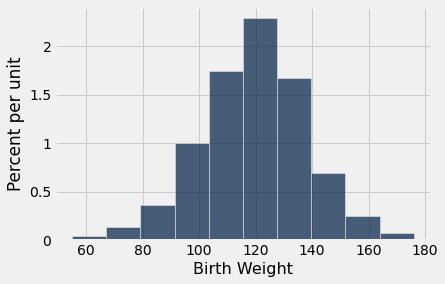

In [9]:
births.hist('Birth Weight')

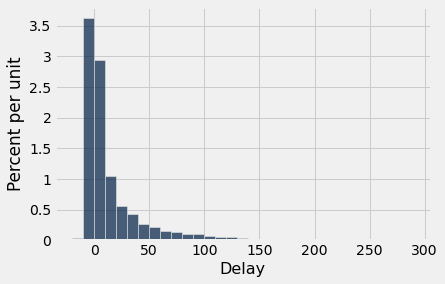

In [10]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [11]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [12]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [13]:
one_sample_mean(25)

32.68

In [14]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [15]:
sample_means_25 = ten_thousand_sample_means(25)

Population Average: 16.658155515370705


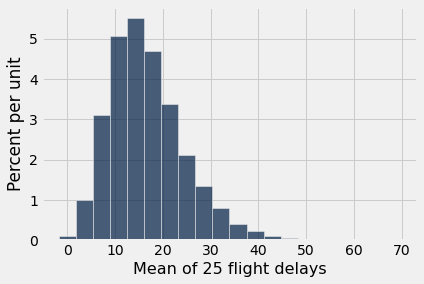

In [16]:
Table().with_column('Mean of 25 flight delays', sample_means_25).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


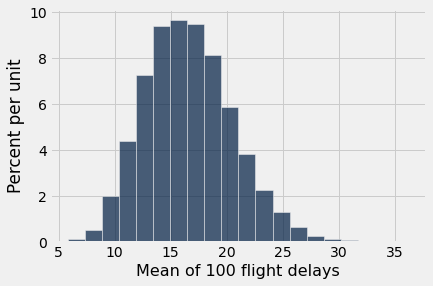

In [17]:
sample_means_100 = ten_thousand_sample_means(100)
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)
print('Population Average:', delay_mean)

Population Average: 16.658155515370705


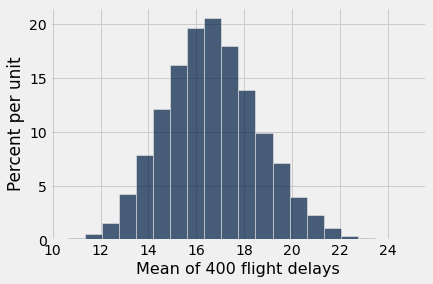

In [18]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

Population Average: 16.658155515370705


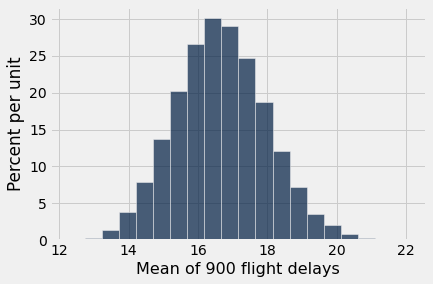

In [19]:
sample_means_900 = ten_thousand_sample_means(900)
Table().with_column('Mean of 900 flight delays', sample_means_900).hist(bins=20)
print('Population Average:', delay_mean)

## Distribution of the Sample Average

In [20]:
means_tbl = Table().with_columns(
    '25',  sample_means_25,
    '100', sample_means_100,
    '400', sample_means_400,
    '900', sample_means_900,
)

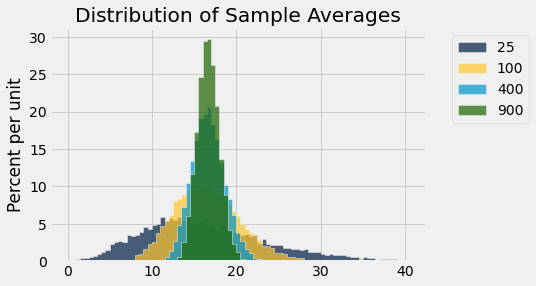

In [37]:
means_tbl.hist(bins = np.arange(0, 41, 0.5))
plots.title('Distribution of Sample Averages');

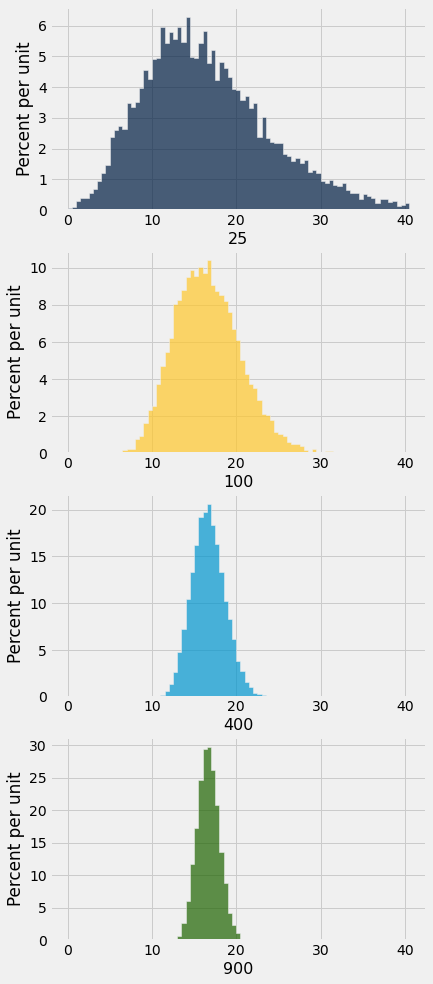

In [38]:
means_tbl.hist(bins = np.arange(0, 41, 0.5), overlay=False)

## Properties of the Distribution of the Sample Average

In [23]:
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [24]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  25
Population mean: 16.658155515370705
Average of sample means:  16.551364000000003
Population SD: 39.480199851609314
SD of sample means: 7.862548847511474


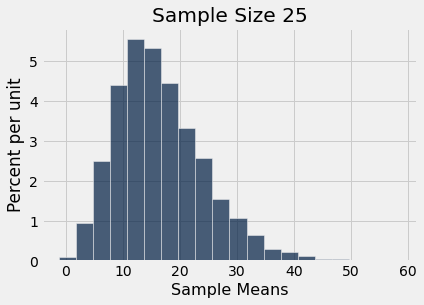

In [25]:
plot_and_summarize_sample_means(25)

In [26]:
39.48 / 7.97

4.95357590966123

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.636239
Population SD: 39.480199851609314
SD of sample means: 3.9222922870279566


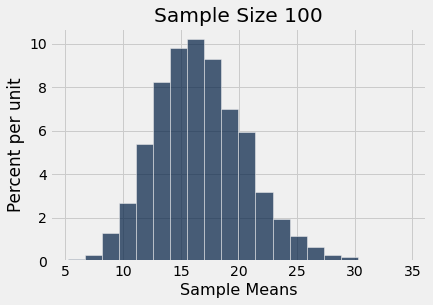

In [27]:
plot_and_summarize_sample_means(100)

In [28]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.63602775
Population SD: 39.480199851609314
SD of sample means: 1.953554916838771


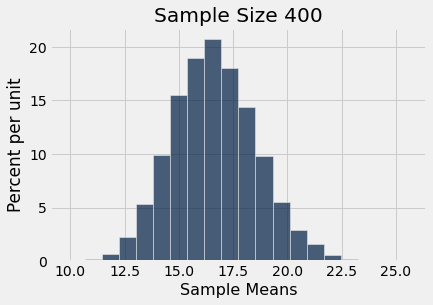

In [29]:
plot_and_summarize_sample_means(400)

In [30]:
39.48 / 1.973

20.010136847440442

Sample size:  900
Population mean: 16.658155515370705
Average of sample means:  16.654628111111112
Population SD: 39.480199851609314
SD of sample means: 1.3218959531046521


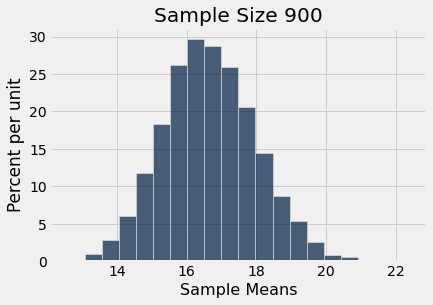

In [31]:
plot_and_summarize_sample_means(900)

In [32]:
39.48 / 1.305

30.25287356321839